# Analysis of Cylists' Performance & Statistics

In [1]:
# import all necessary libraries for data manipulation and analysis
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline
from scipy import stats
import seaborn as sns

In [2]:
# read data retrieved from Strava
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


In [3]:
# read data retrieved form GoldenCheetah
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


In [4]:
# merge of two data sets
merged = cheetah.join(strava, how = 'inner')
merged.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
2018-01-27 19:39:49+00:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride
2018-01-27 20:01:32+00:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race
2018-01-31 21:13:34+00:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride
2018-02-05 21:06:42+00:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride
2018-02-07 06:59:05+00:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride


## Removal of rides with no measued power

In [5]:
# remove rides where power meter wasn't used (where device_watts is False)
merged = merged[merged.device_watts != False]
merged['device_watts'].head()

2018-01-27 19:39:49+00:00    True
2018-01-27 20:01:32+00:00    True
2018-02-05 21:06:42+00:00    True
2018-02-07 06:59:05+00:00    True
2018-02-09 19:18:03+00:00    True
Name: device_watts, dtype: object

## Histograms of Various Variables

### Explanation of Histograms

* The histogram of distance and moving time seems to have a bimodal distribution.
* The histogram of TTS is right skewed.
* The histrogram of average speed has a normal distribution, however this dataset has outliers which are need to taken into account. 


Text(0, 0.5, 'Frequency')

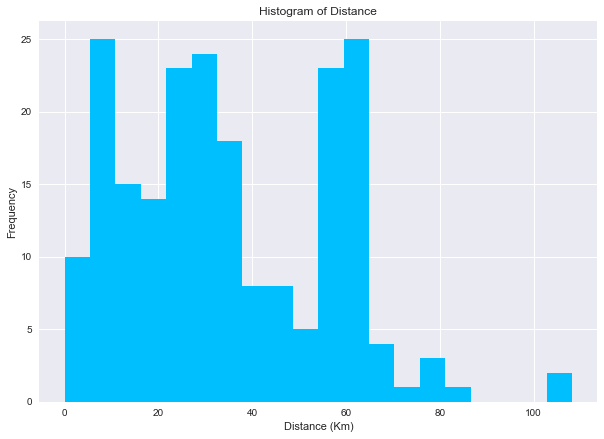

In [23]:
# histogram of distance
plt.figure(figsize=(10, 7))
merged['distance'].hist(normed = 0, histtype = 'stepfilled', bins = 20, color = 'deepskyblue')
plt.title('Histogram of Distance')
plt.xlabel('Distance (Km)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

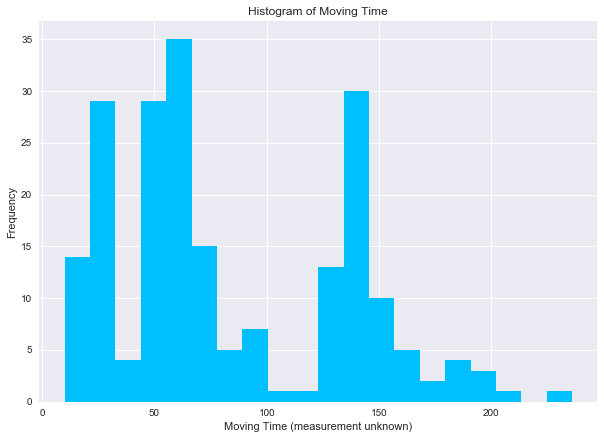

In [24]:
# histogram of moving_time
plt.figure(figsize=(10, 7))
merged['moving_time'].hist(normed = 0, histtype = 'stepfilled', bins = 20, color = 'deepskyblue')
plt.title('Histogram of Moving Time')
plt.xlabel('Moving Time (measurement unknown)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

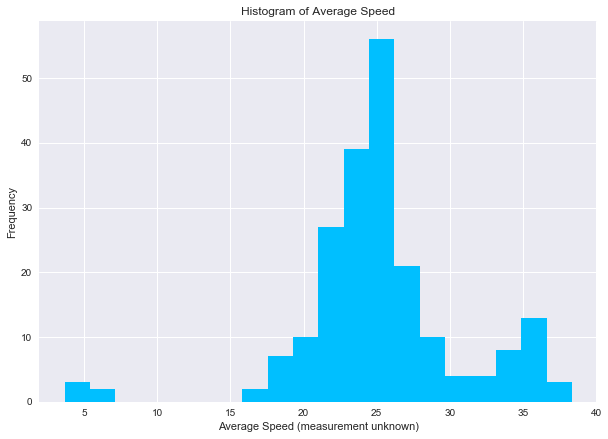

In [25]:
# histogram of Average Speed
plt.figure(figsize=(10, 7))
merged['Average Speed'].hist(normed = 0, histtype = 'stepfilled', bins = 20, color = 'deepskyblue')
plt.title('Histogram of Average Speed')
plt.xlabel('Average Speed (measurement unknown)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

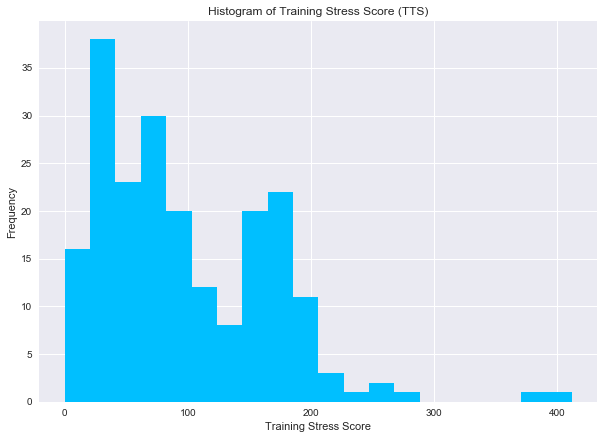

In [26]:
# histogram of TSS (Training Stress Score)
plt.figure(figsize=(10, 7))
merged['TSS'].hist(normed = 0, histtype = 'stepfilled', bins = 20, color = 'deepskyblue')
plt.title('Histogram of Training Stress Score (TTS)')
plt.xlabel('Training Stress Score')
plt.ylabel('Frequency')

## Finding Correlation Between Variables

In [10]:
# selection of columns in interest & create correlation matrix
selected = merged[['distance', 'moving_time', 'Average Speed','average_heartrate', 'Average Power', 'Elevation Gain', 'NP', 'TSS']]
selected.corr()

,distance,moving_time,Average Speed,average_heartrate,Average Power,Elevation Gain,NP,TSS
distance,1.000000,0.939383,0.187363,0.114595,0.129199,0.805468,0.270703,0.922565
moving_time,0.939383,1.000000,-0.103484,-0.048611,-0.109838,0.813146,0.044431,0.871368
Average Speed,0.187363,-0.103484,1.000000,0.742388,0.814403,-0.016160,0.674857,0.134054
average_heartrate,0.114595,-0.048611,0.742388,1.000000,0.692413,0.071553,0.593091,0.113775
Average Power,0.129199,-0.109838,0.814403,0.692413,1.000000,-0.035987,0.844487,0.225290
Elevation Gain,0.805468,0.813146,-0.016160,0.071553,-0.035987,1.000000,0.229933,0.828928
NP,0.270703,0.044431,0.674857,0.593091,0.844487,0.229933,1.000000,0.432286
TSS,0.922565,0.871368,0.134054,0.113775,0.225290,0.828928,0.432286,1.000000


### Summary of correlation matrix

There are possible correlations between the following variables:

* distance & moving_time
* distance & elavation Gain
* distance & TSS
* moving_time & Elvation Gain
* moving_time & TSS
* Average Speed & average_heartrate
* Average speed & Average Power etc.

Values that are above or at around 0.70 are possible candidates for a linear relationship.


C:\Users\renat\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\renat\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


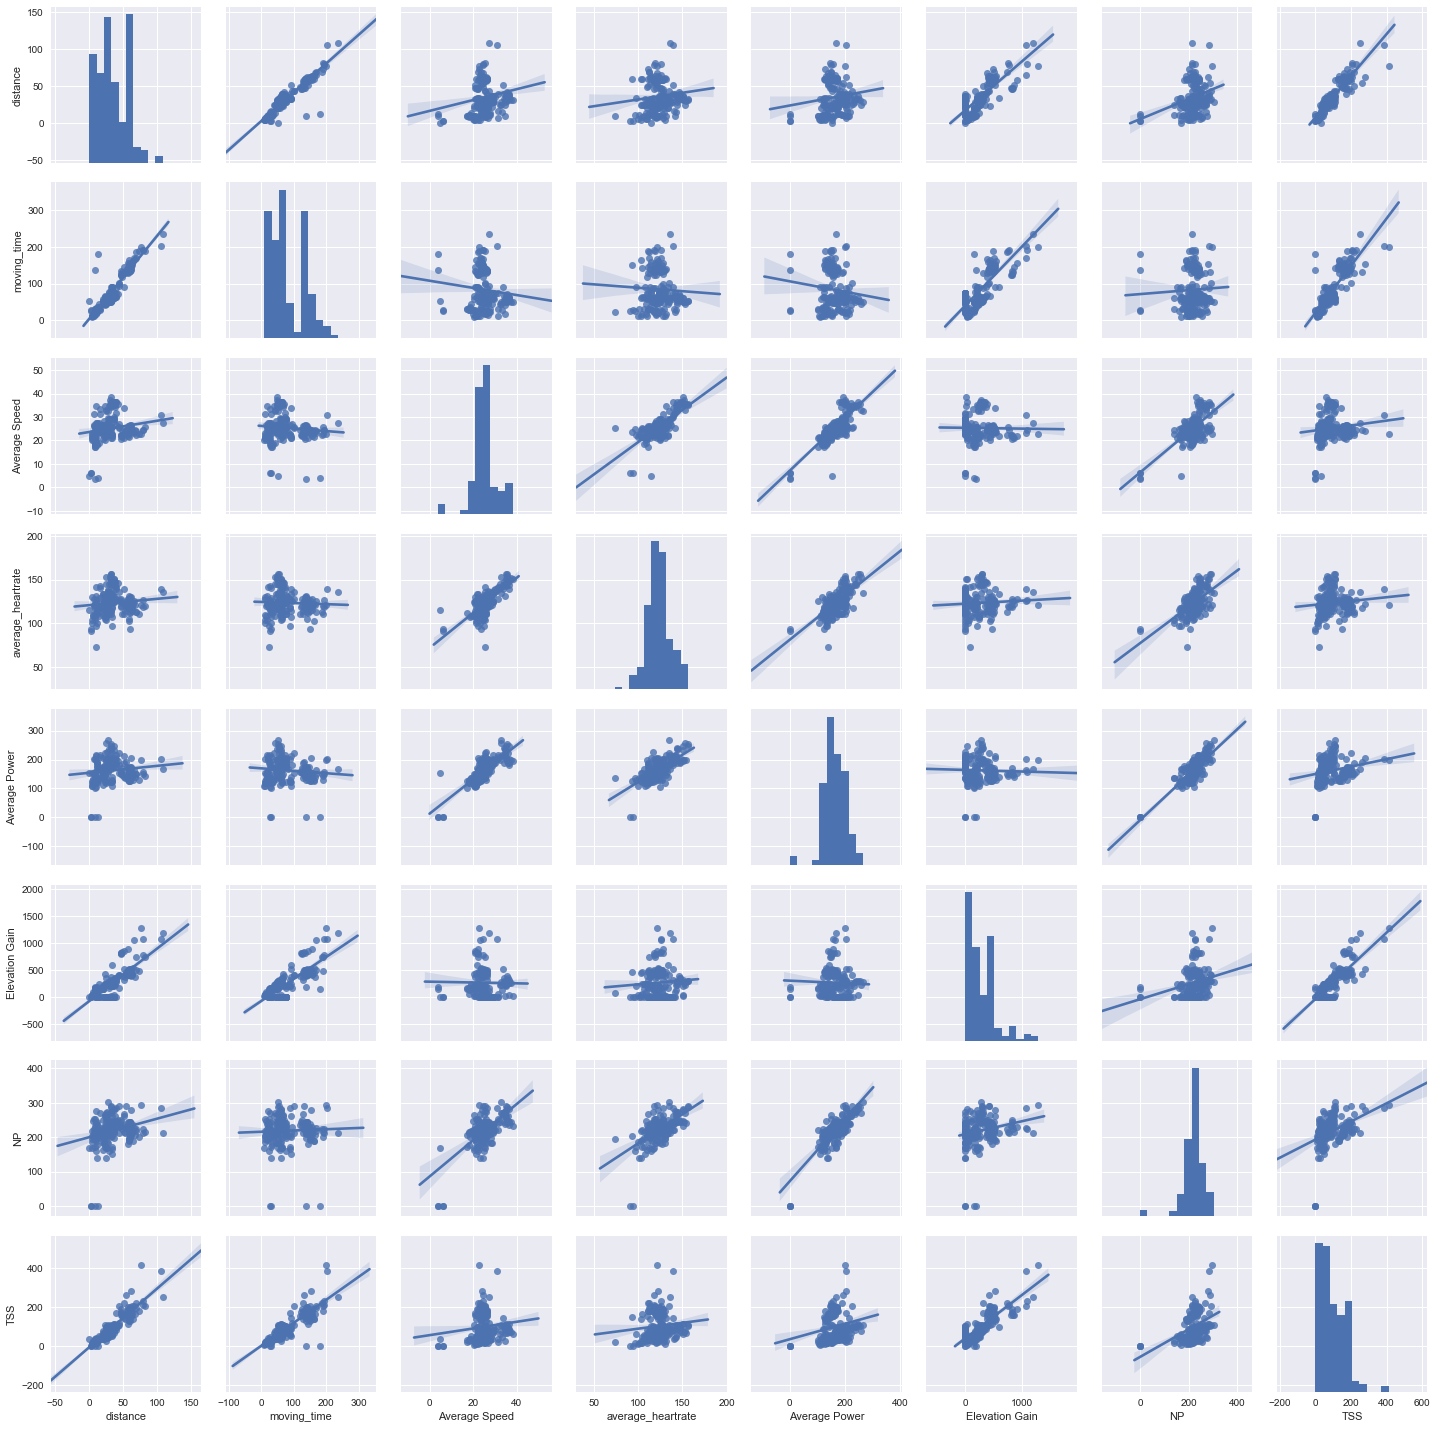

In [11]:
# scatterplot matrix for the variables in 'selected' list 
sns.pairplot(selected, kind='reg')

### Summary of Scatterplot Matrix

It shows that there is a possible relationship between the following variables:

* distance & moving_time
* distance & TSS
* Average Heart Rate & Average Power
* Average Power & NP


## Exploration of different bicycle workout types

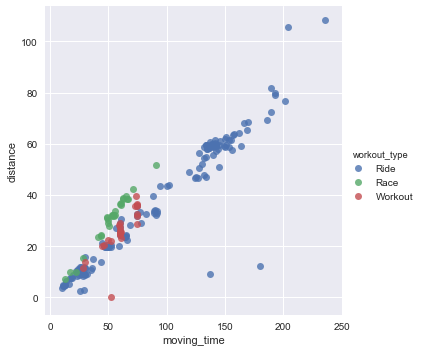

In [12]:
# scatter plot of distance and moving_time by workout type
sns.lmplot(x = 'moving_time', y = 'distance', data = merged, fit_reg = False, hue = 'workout_type', legend = True)

### Comments on the scatter plot

The scatter plot of distance and moving_time by workout type displays that 'Race' & 'Workout' types are tend to have shorter distances and moving times compared to 'ride' workout type. The green and red data points are centered around the left hand bottom corner. 

While the 'ride' workout type have several outliers which are need to be further examined to determine thier importance.


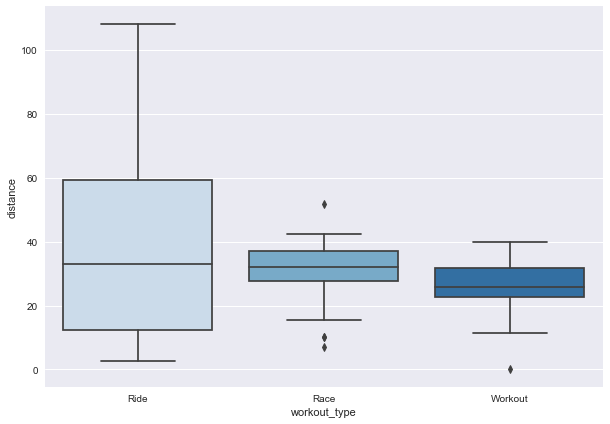

In [27]:
# comparative boxplot of distance by workout type
plt.figure(figsize=(10, 7))
sns.boxplot(x = merged['workout_type'], y = merged['distance'], palette = 'Blues')

### Comments on the comperative boxplot

The comparative boxplot makes it easy to compare the distribution of distance in the three workout types (Ride, Race, Workout). It can be observed that the range for 'Ride' is significantly greater compared to the other two types. Both 'Race' and 'Workout' types have outliers. While, all workout types have approximately the same median distance.

## Challange Questions

### What leads to more kudos?

* Greater kudos is received as distance increases. People feel that they achieved more if they ride bicycle for a longer distance.
* As Training Stress Score (TSS) increases, kudos increase as well. By completing a harder track, people think that they have achieved something big.
* Average temperature has nothing to do with kudos.
* People who cycle in race have a significantly higher median kudos compared to the other two workout types (Ride, Workout). (see comparative boxplots below)

C:\Users\renat\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\renat\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


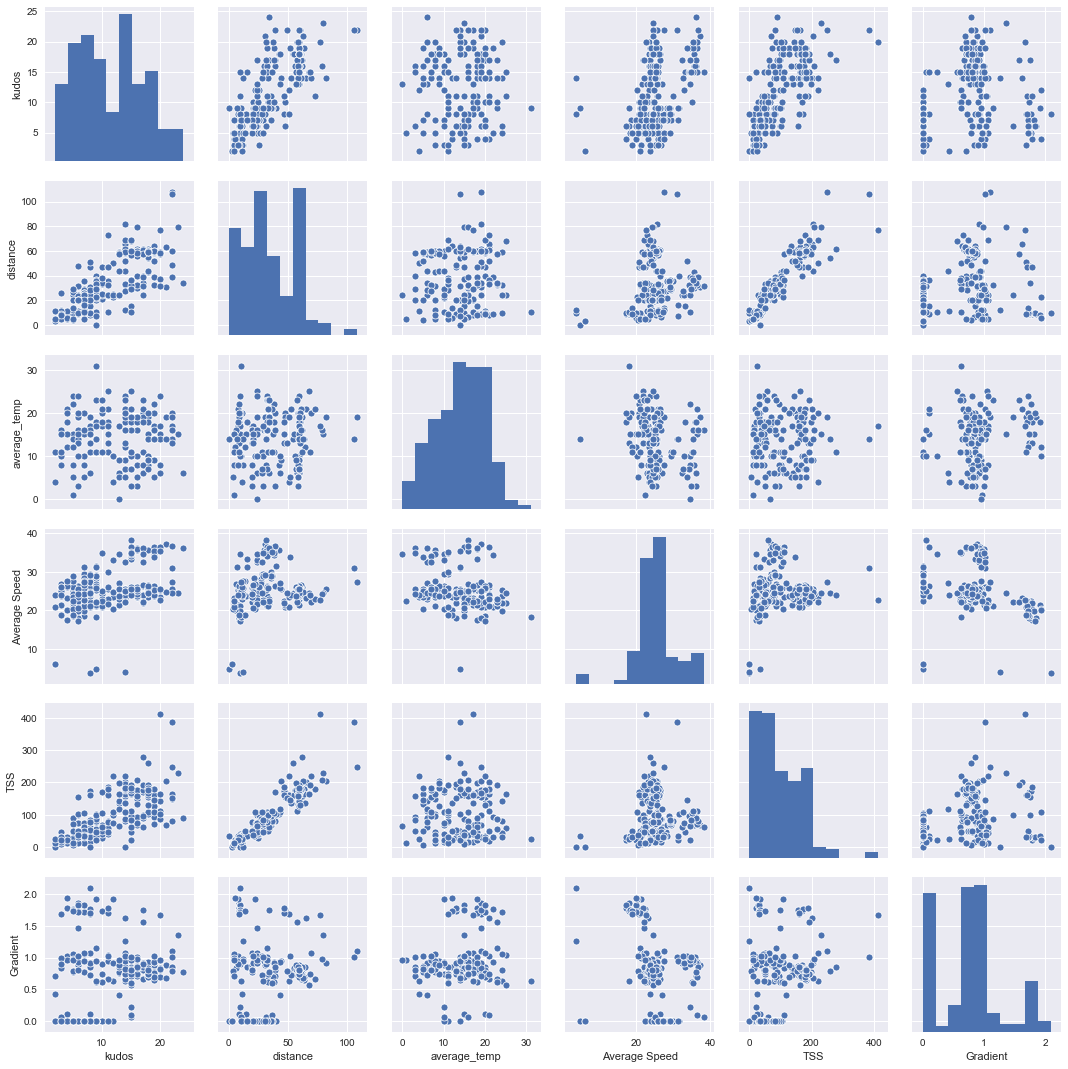

In [14]:
# scatterplot of kudos with different variables
kudos = merged[['kudos', 'distance', 'average_temp', 'Average Speed', 'TSS', 'Gradient']]
sns.pairplot(kudos)

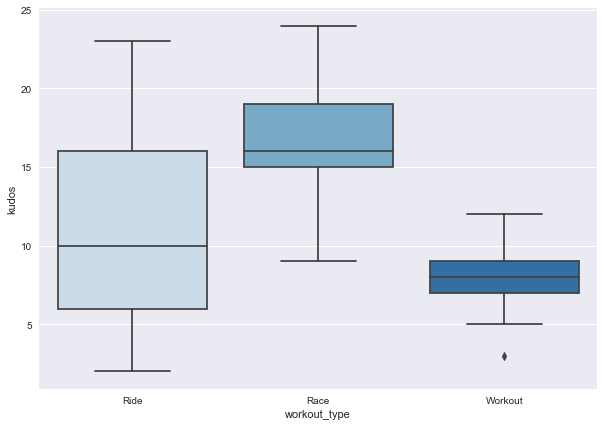

In [28]:
# comparative boxplots of kudos by workout types
plt.figure(figsize=(10, 7))
sns.boxplot(x = merged['workout_type'], y = merged['kudos'], palette = 'Blues')